### 1. Imports

In [1]:
from pprint import pprint

from src.dataset import create_dataloaders
from src.utils import train_pipeline
from src.models import LSTMSequenceModel, BertSequenceModel, GPT2SequenceModel, MambaSequenceModel

### 2. Constants

In [2]:
features_list = ["mcc", "day_of_week", "payment_system"] # target feature name should be on index 0 (mcc is target this case)

train_data_path = "part_000_0_to_23646.parquet"
val_data_path = "part_000_1063620_to_1074462.parquet"

### 3. Create dataloaders

In [3]:
dataloader_train, dataloader_val, feature2vocab_size = create_dataloaders(features_list, train_data_path, val_data_path)
feature2vocab_size


Calculating ids for mcc


  0%|          | 0/22743 [00:00<?, ?it/s]

Resulting vocab size: 112 (out of 112 tokens overall, due to MIN_FREQ=3)

Calculating ids for day_of_week


  0%|          | 0/22743 [00:00<?, ?it/s]

Resulting vocab size: 11 (out of 11 tokens overall, due to MIN_FREQ=3)

Calculating ids for payment_system


  0%|          | 0/22743 [00:00<?, ?it/s]

Resulting vocab size: 10 (out of 10 tokens overall, due to MIN_FREQ=3)


{'mcc': 112, 'day_of_week': 11, 'payment_system': 10}

### 4. Train models

#### 4.1 LSTM

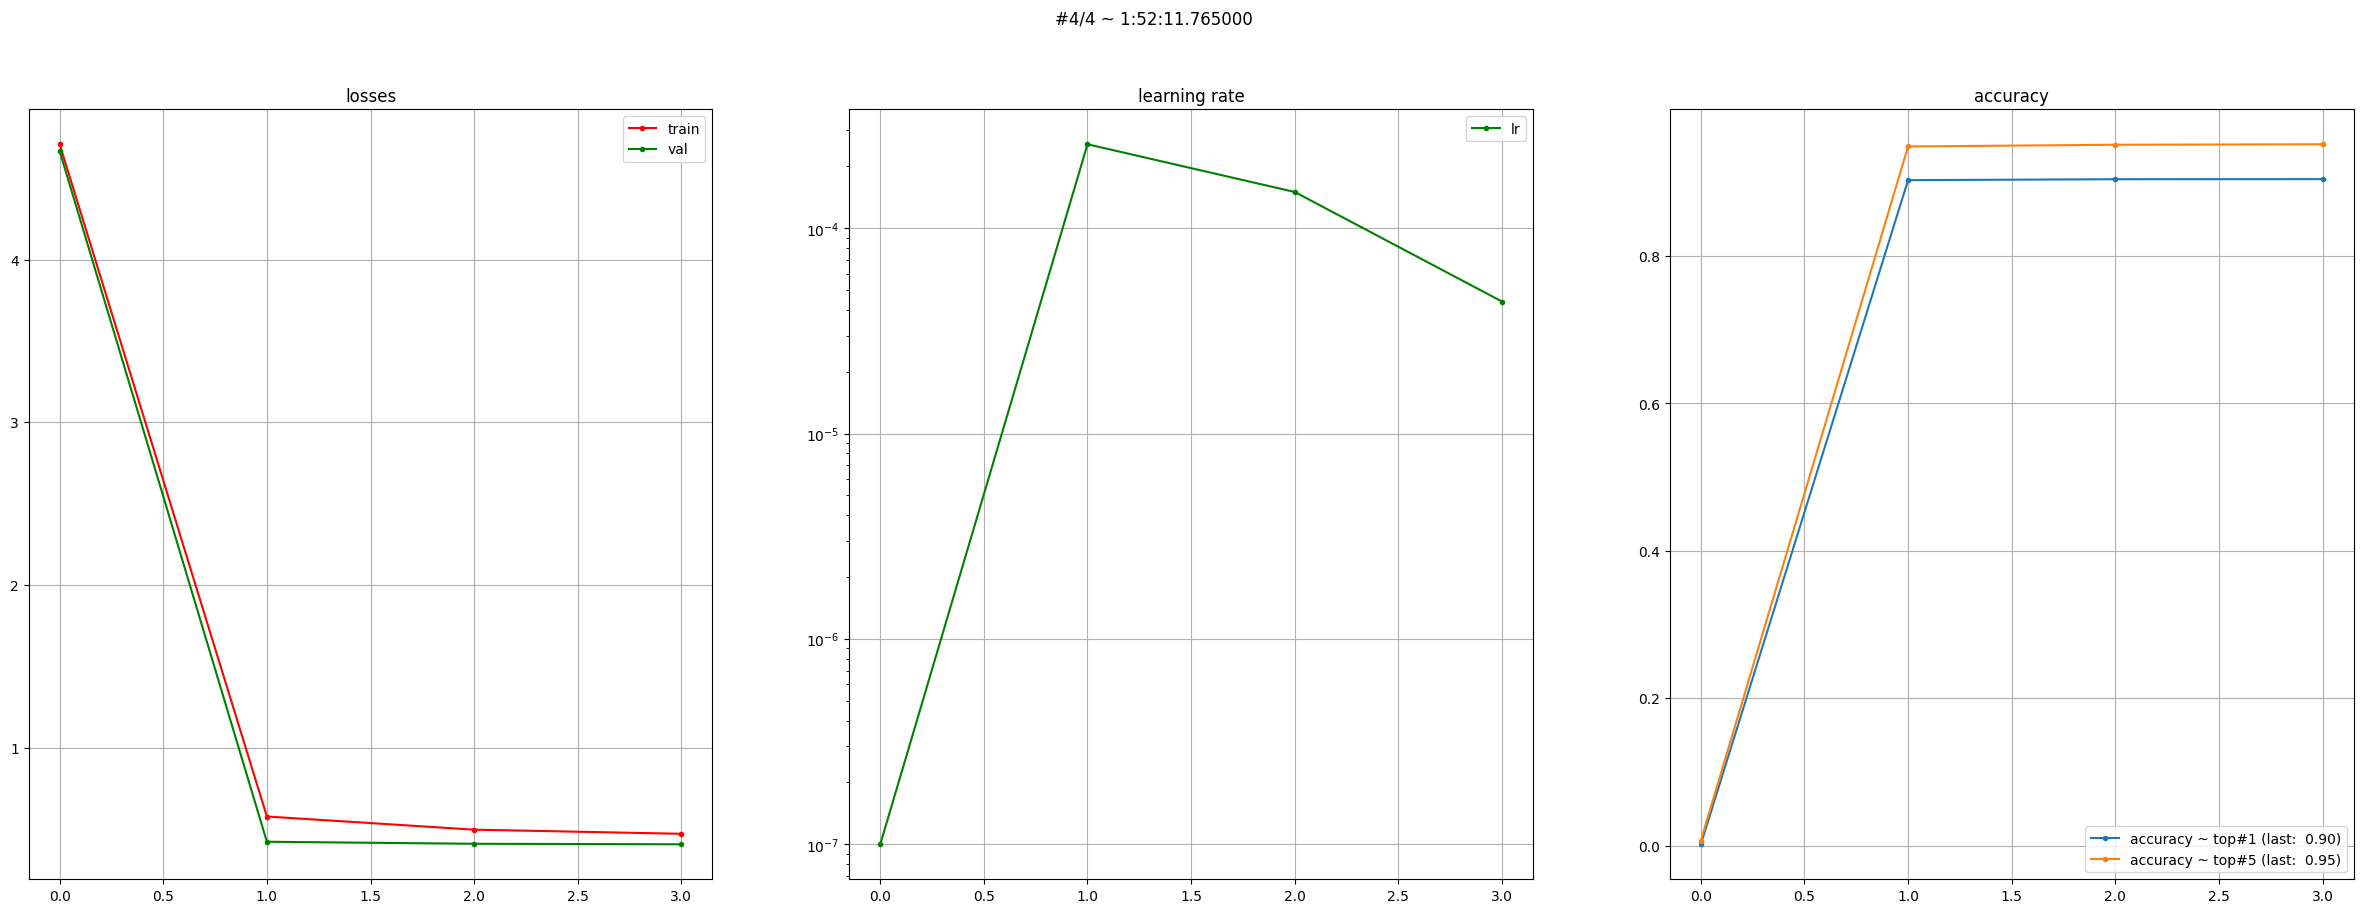

Learning process ended with early stop after epoch 4
defaultdict(<class 'list'>,
            { 'accuracy ~ top#1': [ 0.0018271369119719704,
                                    0.9028281548465725,
                                    0.904082399444379,
                                    0.904251108528528],
              'accuracy ~ top#5': [ 0.0069465117760225395,
                                    0.9485233980970588,
                                    0.9508608742433616,
                                    0.9514875298539679]})


In [4]:
metrics = train_pipeline(
    model_class=LSTMSequenceModel, 
    model_name="lstm", 
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val, 
    feature2vocab_size=feature2vocab_size, 
    hidden_dim=128, 
    epochs=4
)
pprint(metrics, indent=2)

#### 4.2 Masked bert 

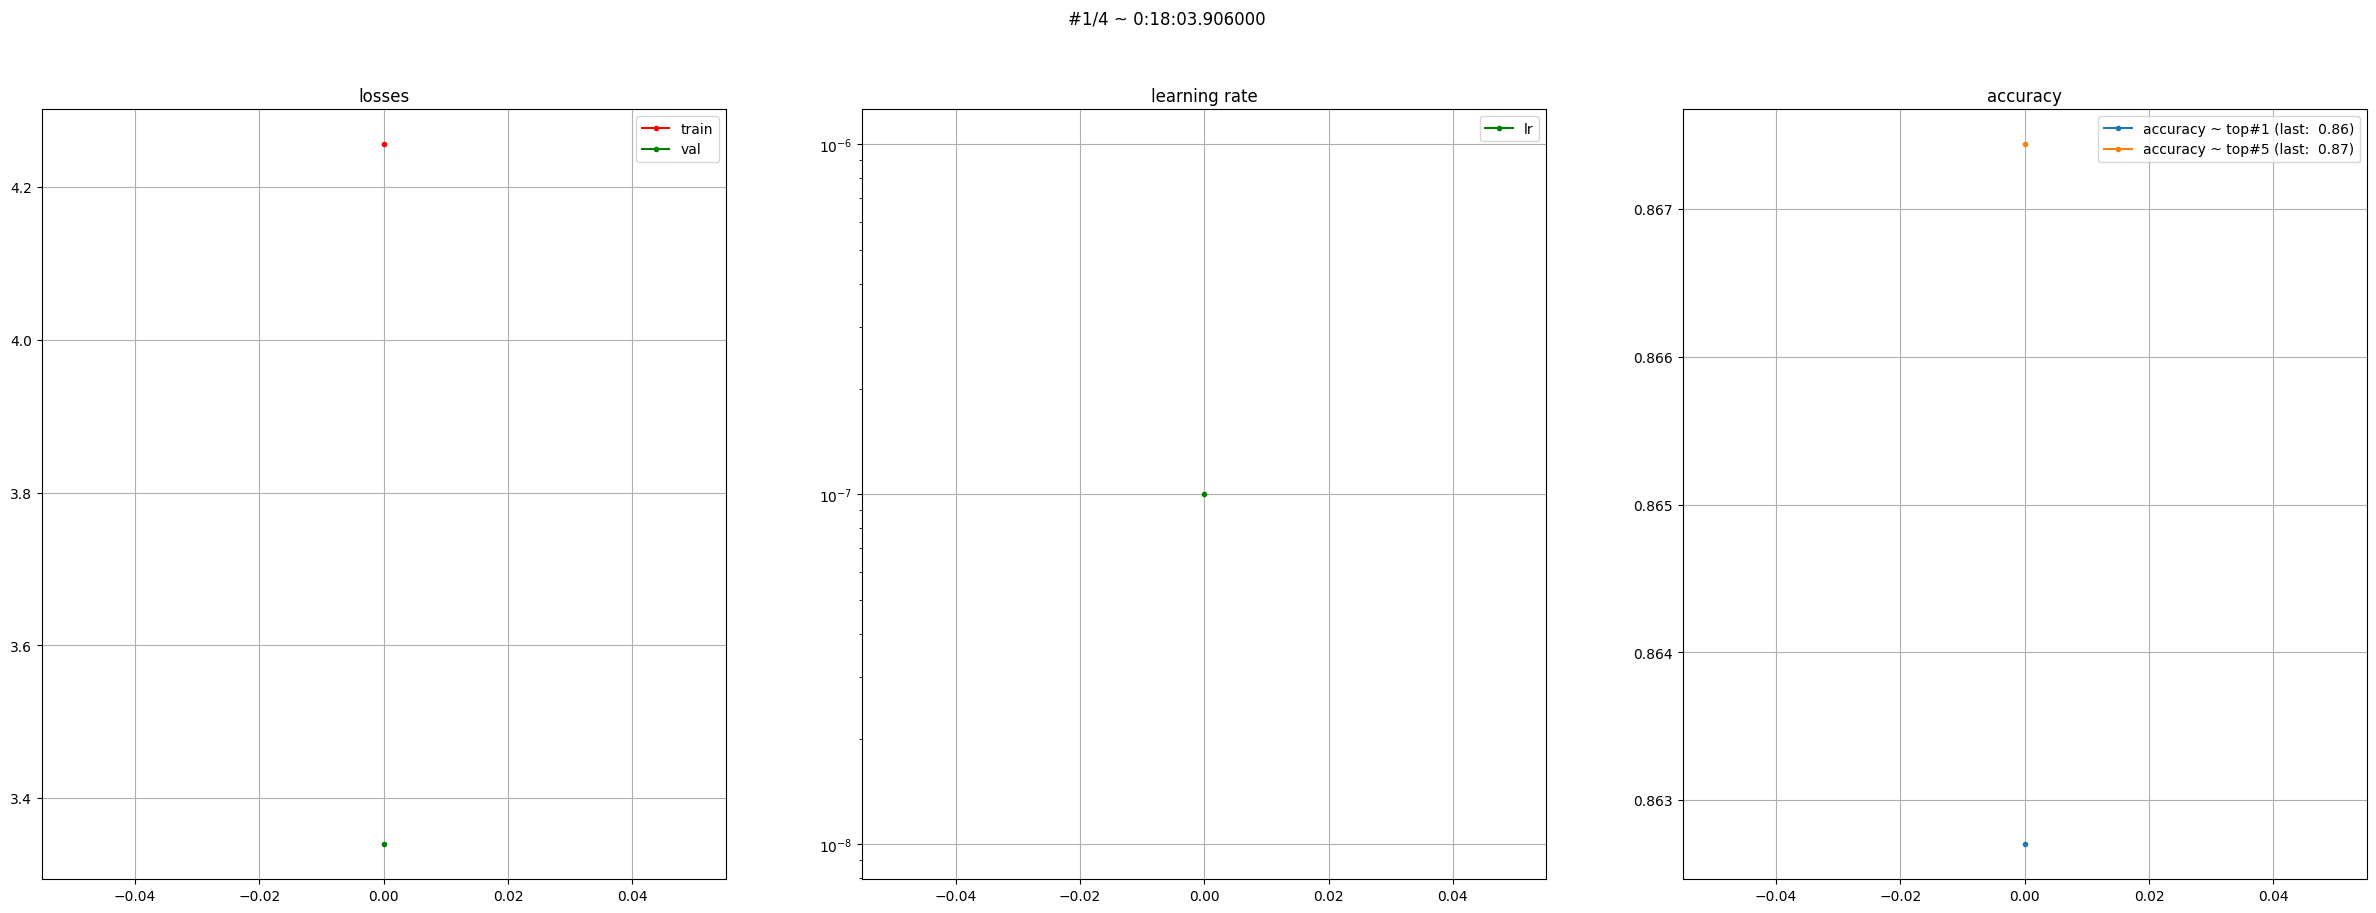

#2/4:


 99%|█████████▉| 650/658 [10:07<00:07,  1.06it/s]

In [6]:
metrics = train_pipeline(
    model_class=BertSequenceModel, 
    model_name="bert", 
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val, 
    feature2vocab_size=feature2vocab_size, 
    hidden_dim=128, 
    epochs=4
)
pprint(metrics, indent=2)

#### 4.3 GPT2

In [ ]:
metrics = train_pipeline(
    model_class=GPT2SequenceModel, 
    model_name="gpt2", 
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val, 
    feature2vocab_size=feature2vocab_size, 
    hidden_dim=128, 
    epochs=4
)
pprint(metrics, indent=2)

#### 4.4 Mamba

In [ ]:
metrics = train_pipeline(
    model_class=MambaSequenceModel, 
    model_name="mamba", 
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val, 
    feature2vocab_size=feature2vocab_size, 
    hidden_dim=128, 
    epochs=4
)
pprint(metrics, indent=2)